In [79]:
#import libraries
import pandas as pd
#import string for handling punctuation
import string
#get all stop words that is words that dont improve context
from nltk.corpus import stopwords
#to stem words (that is reduce words to their root that is meaningful)
from nltk.stem import PorterStemmer

#convert bag of words to a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer

#visualize
from matplotlib import pyplot as plt
import seaborn as sns



In [80]:
#instantiate stemmer
ps = PorterStemmer()
#instantiate word vectorizer
cv = CountVectorizer()

In [7]:
#Import a tab separated values file
emails = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None, names=['label', 'message'])

In [12]:
#See categories
emails['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
[msg for msg in emails.loc[0:5, 'message']]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"]

In [64]:
def make_bow(x):
    msg = x['message']
    
    #covnert all to lowercase
    msg = msg.lower()
    
    #get rid of punctuation
    msg = [char for char in msg if char not in punctuation]
    msg = ''.join(msg)
    
    #lets get rid of stopwords and stem words
    msg = [ps.stem(word) for word in msg.split() if word not in useless_words]
    msg = ' '.join(msg)
    
    
    return msg

In [66]:
emails['bow'] = emails.loc[0:20, :].apply(make_bow, axis=1)

In [40]:
punctuation = [character for character in string.punctuation]

In [51]:
useless_words = stopwords.words('english')

In [59]:
emails.loc[20, 'message']

'Is that seriously how you spell his name?'

In [70]:
def lom(x):
    return len(x['message'])

In [72]:
emails['length'] = emails.apply(lom, axis=1)

In [73]:
emails

,label,message,bow,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,160
5568,ham,Will ü b going to esplanade fr home?,NaN,36
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,57
5570,ham,The guy did some bitching but I acted like i'd...,NaN,125


<AxesSubplot:xlabel='label', ylabel='length'>

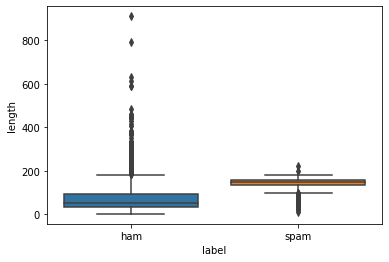

In [77]:
sns.boxplot(data=emails, y='length', x='label')

### Creating word matix - sparse matrix

In [85]:
#drop records where bow = 0
emails.dropna(inplace=True)

In [86]:
cv.fit(emails['bow'])

CountVectorizer()

In [92]:
sparse_matrix = pd.DataFrame(cv.transform(emails['bow']).toarray())

In [97]:
analytical = pd.concat([emails[['label', 'length']], sparse_matrix], axis=1)

In [98]:
from sklearn.model_selection import train_test_split

In [124]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(analytical.drop(['label', 'length'], axis=1), analytical['label'], test_size=0.2, random_state=303)

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(Xtrain, ytrain)
pred = rf.predict(Xtest)

In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

         ham       0.60      1.00      0.75         3
        spam       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [123]:
sparse_matrix

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
